In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
xrfile = '/h/eol/bansemer/holodec/holodec-ml/datasets/synthetic_holograms_1particle_gamma_training.nc'

In [3]:
ds = xr.open_dataset(xrfile,chunks={'hologram_number':1})

In [4]:
ds.data_vars

Data variables:
    hid      (particle) float32 dask.array<shape=(50000,), chunksize=(50000,)>
    d        (particle) float32 dask.array<shape=(50000,), chunksize=(50000,)>
    x        (particle) float32 dask.array<shape=(50000,), chunksize=(50000,)>
    y        (particle) float32 dask.array<shape=(50000,), chunksize=(50000,)>
    z        (particle) float32 dask.array<shape=(50000,), chunksize=(50000,)>
    n0       (particle) float32 dask.array<shape=(50000,), chunksize=(50000,)>
    mu       (particle) float32 dask.array<shape=(50000,), chunksize=(50000,)>
    lam      (particle) float32 dask.array<shape=(50000,), chunksize=(50000,)>
    distid   (particle) float32 dask.array<shape=(50000,), chunksize=(50000,)>
    image    (hologram_number, xsize, ysize) uint8 dask.array<shape=(50000, 600, 400), chunksize=(1, 600, 400)>

In [9]:
im = 10

In [14]:
particle_index = np.nonzero(ds['distid'].values==im+1)[0]  

In [13]:
ds['n0'].values[im]

100000000.0

In [15]:
particle_index.size

1000

In [39]:
histogram_edges = np.logspace(0,3,40)

In [40]:
hist0 = np.histogram(ds['d'].values[particle_index],bins=histogram_edges)

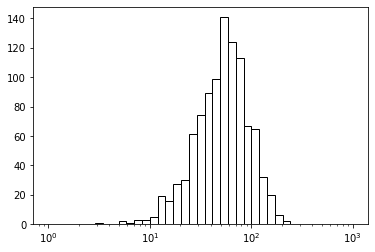

In [41]:
plt.figure()
plt.bar(histogram_edges[:-1],hist0[0].flatten(),np.diff(histogram_edges),align='edge',facecolor='white',edgecolor='k')
plt.xscale('log')

In [42]:
ds.close()